In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'Images/green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/green/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)

reddata = []
for i in range(1,10):
    x = 'Images/red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/red/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)

redcardata = []
for i in range(1,10):
    x = 'Images/red_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/red_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/red_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
redcardata = np.array(redcardata)

greencardata = []
for i in range(1,10):
    x = 'Images/green_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/green_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/green_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
greencardata = np.array(greencardata)
print(reddata.shape)
print(greendata.shape)
print(redcardata.shape)
print(greencardata.shape)

(173, 100, 100, 3)
(186, 100, 100, 3)
(165, 100, 100, 3)
(170, 100, 100, 3)


In [3]:
import numpy as np
def same_shuffle(arr1,arr2):
    size = arr2.size
    print(size)
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [4]:
greenlist = list(greendata)
redlist = list(reddata)
# greencarlist = list(greencardata)
# redcarlist = list(redcardata)
datalist = greenlist+redlist
data = np.array(datalist)
y_green = list(np.zeros(186))
y_red = list(np.zeros(173)+1)
y = np.array(y_green + y_red)
data, y = same_shuffle(data, y)
data_test = data[290:]
data = data[:290]
y_test = y[290:]
y = y[:290]
print(data_test.shape)
print(data.shape)

359
(69, 100, 100, 3)
(290, 100, 100, 3)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [15]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7056)             

In [16]:
history = model.fit(data, y, epochs=30,validation_data=(data_test,y_test))

Train on 290 samples, validate on 69 samples
Epoch 1/30
290/290 [==============================] - 3s 9ms/sample - loss: 5.8372 - accuracy: 0.5069 - val_loss: 0.8608 - val_accuracy: 0.5362
Epoch 2/30
290/290 [==============================] - 2s 7ms/sample - loss: 0.8728 - accuracy: 0.5448 - val_loss: 0.6869 - val_accuracy: 0.5362
Epoch 3/30
290/290 [==============================] - 2s 7ms/sample - loss: 0.6969 - accuracy: 0.4690 - val_loss: 0.6636 - val_accuracy: 0.5217
Epoch 4/30
290/290 [==============================] - 2s 7ms/sample - loss: 0.6859 - accuracy: 0.5552 - val_loss: 0.6599 - val_accuracy: 0.6232
Epoch 5/30
290/290 [==============================] - 2s 8ms/sample - loss: 0.6454 - accuracy: 0.6000 - val_loss: 0.6563 - val_accuracy: 0.5797
Epoch 6/30
290/290 [==============================] - 2s 8ms/sample - loss: 0.6106 - accuracy: 0.6069 - val_loss: 1.1890 - val_accuracy: 0.6087
Epoch 7/30
290/290 [==============================] - 2s 8ms/sample - loss: 0.7144 - accura

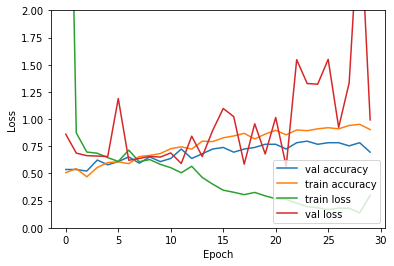

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.plot(history.history['loss'], label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

In [9]:
model.save('nn.h5')

In [10]:
import tensorflow as tf
model2 = tf.keras.models.load_model('nn.h5')

In [11]:
cap = cv2.VideoCapture(0)
ret,frame = cap.read()
frame = cv2.resize(frame, (100,100))

In [12]:
def toRGB(image):
    return image[:,:,::-1]

In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model2)

In [9]:
tflite_model = converter.convert()

In [10]:
with open ('model.tflite', mode='wb') as file:
    file.write(tflite_model)